## McDonald's Market Segmentation Analysis

## Importing Necessary Libraries

In [1]:
# for data manipulation and analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# for feature decomposition
from sklearn.decomposition import PCA

# for clustering
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# for data pre proprecessing
from sklearn.preprocessing import LabelEncoder
from bioinfokit.visuz import cluster

# warnings filtering
import warnings
warnings.filterwarnings('ignore')

## Loading Data

In [2]:
df = pd.read_csv('mcdonalds.csv')
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


## Exploring Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


### Understanding categorical column

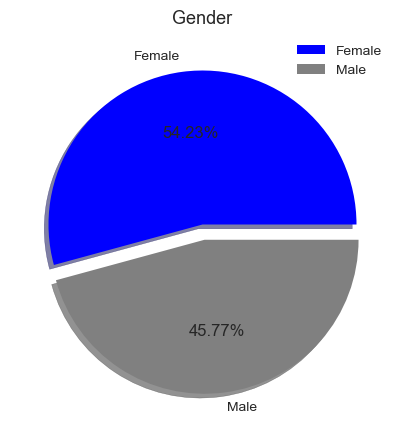

In [4]:
plt.figure(figsize=(5,5))
plt.pie(df['Gender'].value_counts(), colors=['blue','grey'], explode = [0,0.1], labels = ['Female', 'Male'], shadow = True, autopct = '%.2f%%')
plt.title('Gender', fontsize = 13)
plt.axis('off')
plt.legend()
plt.show()

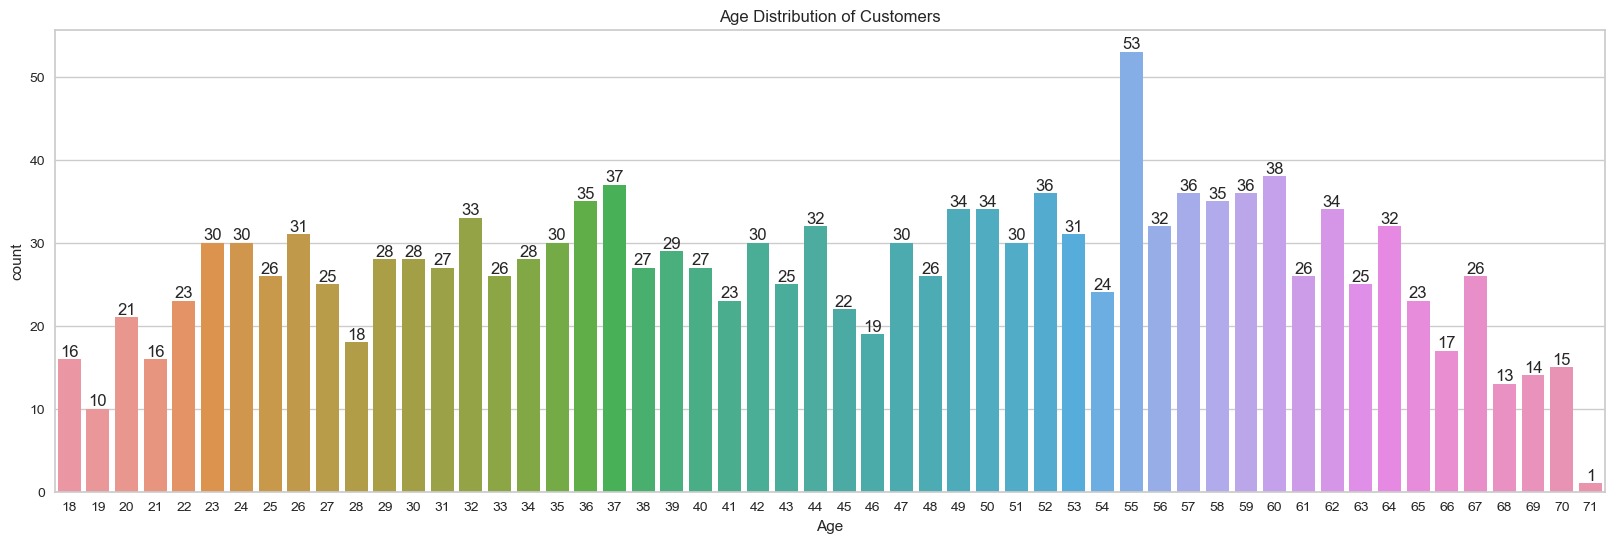

In [5]:
plt.figure(figsize = (20,6))
y = sns.countplot(x=df['Age'])
y.bar_label(y.containers[0])
plt.title('Age Distribution of Customers')
plt.show()

In [6]:
df['VisitFrequency'].value_counts()

Once a month             439
Every three months       342
Once a year              252
Once a week              235
Never                    131
More than once a week     54
Name: VisitFrequency, dtype: int64

In [7]:
df['Like'].value_counts()

+3              229
+2              187
0               169
+4              160
+1              152
I hate it!-5    152
I love it!+5    143
-3               73
-4               71
-2               59
-1               58
Name: Like, dtype: int64

In [8]:
#For convinence renaming the category
df['Like']= pd.to_numeric(df['Like'].replace({'I hate it!-5': '-5','I love it!+5':'+5'}))
df['Like'].value_counts().sort_index(ascending =True)

-5    152
-4     71
-3     73
-2     59
-1     58
 0    169
 1    152
 2    187
 3    229
 4    160
 5    143
Name: Like, dtype: int64

### Label encoding categorical variable

In [9]:
def labelling(x):
    df[x] = LabelEncoder().fit_transform(df[x])
    return df

cat = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting']

for i in cat:
    labelling(i)

In [10]:
x = df.iloc[:, :11]
np.round(x.mean(), 2)

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64

### Principal component analysis

In [11]:
pca = PCA()
pc = pca.fit_transform(x)
names = ['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11']
pca_df = pd.DataFrame(data = pc, columns = [f'PC{i+1}' for i in range(len(x.columns))])

In [12]:
std_dev = np.sqrt(pca.explained_variance_)
prop_var = pca.explained_variance_ratio_
cumulative_prop_var = np.cumsum(prop_var)

summary_df = pd.DataFrame({
    'Standard deviation': std_dev,
    'Proportion of Variance': prop_var,
    'Cumulative Proportion': cumulative_prop_var
})

summary_df.index = [f'PC{i+1}' for i in range(len(std_dev))]
print('Importance of components:')
display(summary_df.T)

Importance of components:


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
Standard deviation,0.757050,0.607456,0.504619,0.398799,0.337405,0.310275,0.289697,0.275122,0.265251,0.248842,0.236903
Proportion of Variance,0.299447,0.192797,0.133045,0.083096,0.059481,0.050300,0.043849,0.039548,0.036761,0.032353,0.029323
Cumulative Proportion,0.299447,0.492244,0.625290,0.708386,0.767866,0.818166,0.862015,0.901563,0.938323,0.970677,1.000000


In [13]:
# Print Standard deviations
print("Standard deviations:")
print(np.round(std_dev, 1))

loadings_df = pd.DataFrame(np.round(pca.components_,3),columns = x.columns,
                           index = [f'PC{i+1}' for i in range(len(std_dev))]).T

Standard deviations:
[0.8 0.6 0.5 0.4 0.3 0.3 0.3 0.3 0.3 0.2 0.2]


### Correlation matrix plot for loadings 

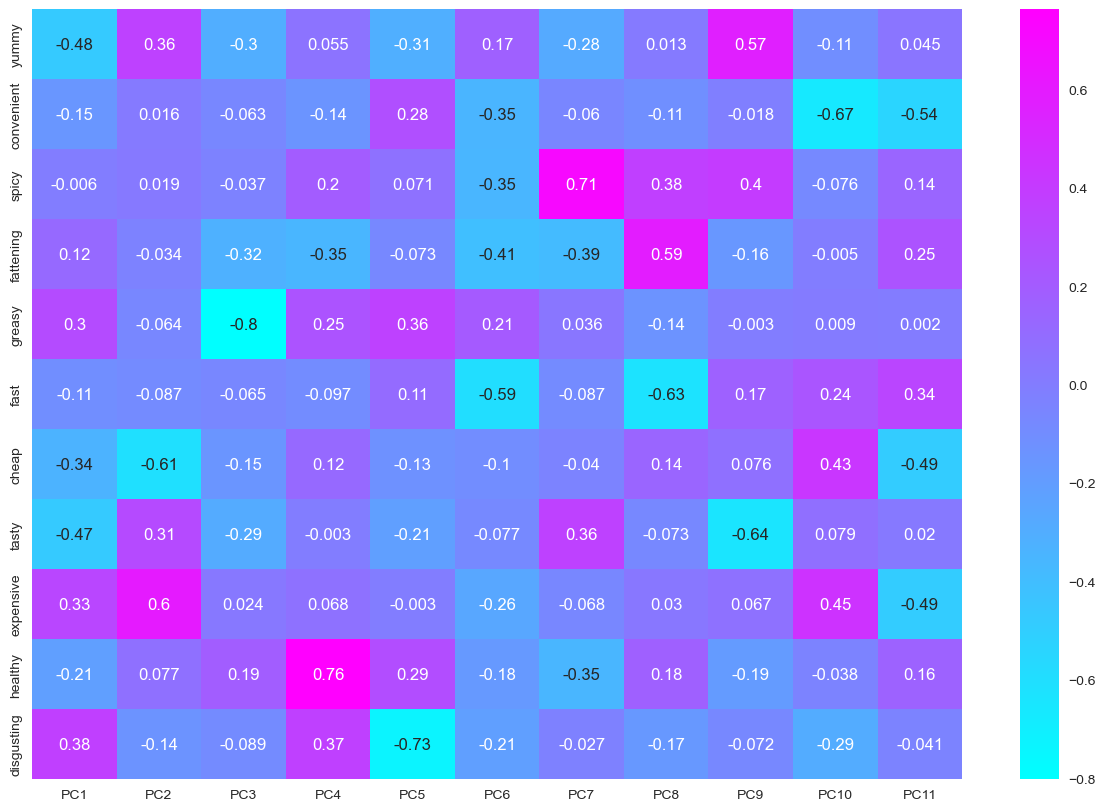

In [14]:
plt.figure(figsize = (15,10))
sns.heatmap(loadings_df, annot=True, cmap='cool')
plt.show()

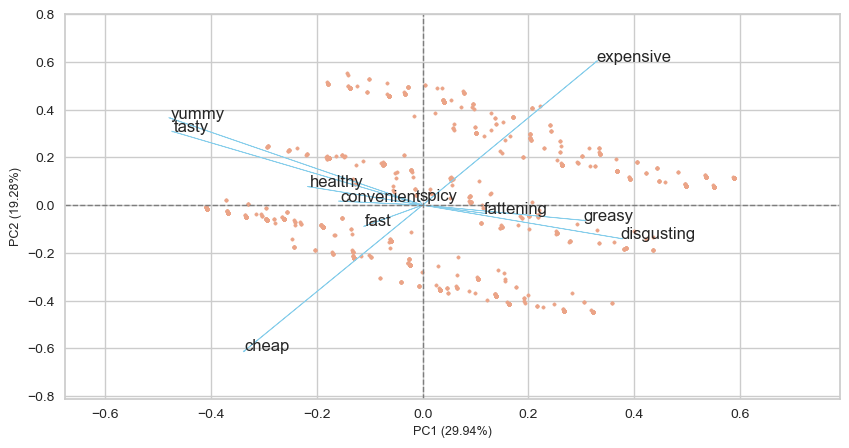

In [15]:
# get 2D biplot
cluster.biplot(cscore=pc, loadings=pca.components_, labels=x.columns, var1=round(pca.explained_variance_ratio_[0]*100, 2),
    var2=round(pca.explained_variance_ratio_[1]*100, 2),show=True,dim=(10,5))

## Extracting Segments

KElbowVisualizer(ax=<AxesSubplot:>, estimator=KMeans(n_clusters=11), k=(1, 12))

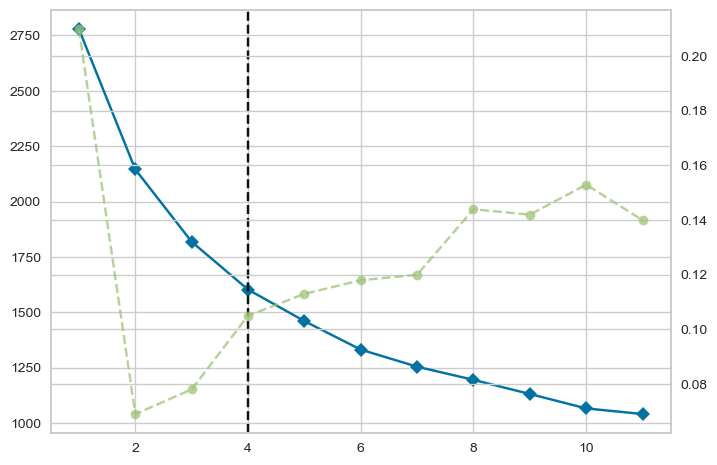

In [16]:
KElbowVisualizer(KMeans(), k=(1,12)).fit(x)

In [24]:
# K means clustering
model = KMeans(n_clusters = 4,random_state = 5)
cluster = model.fit_predict(x)
df['cluster'] = cluster

In [25]:
# to see each cluster size
from collections import Counter
Counter(model.labels_)

Counter({0: 372, 1: 315, 3: 526, 2: 240})

## Profiling Segments

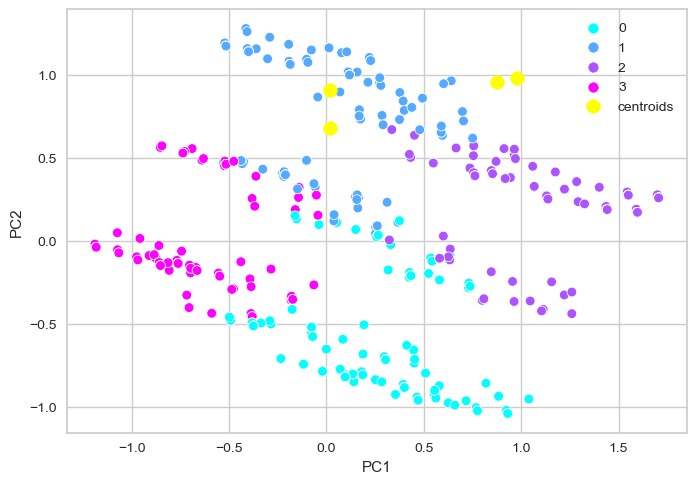

In [26]:
#Visulazing clusters
sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue=model.labels_,palette = 'cool')
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], 
            c='yellow', s=100, label="centroids")
plt.legend()
plt.show()

##  Describing Segment

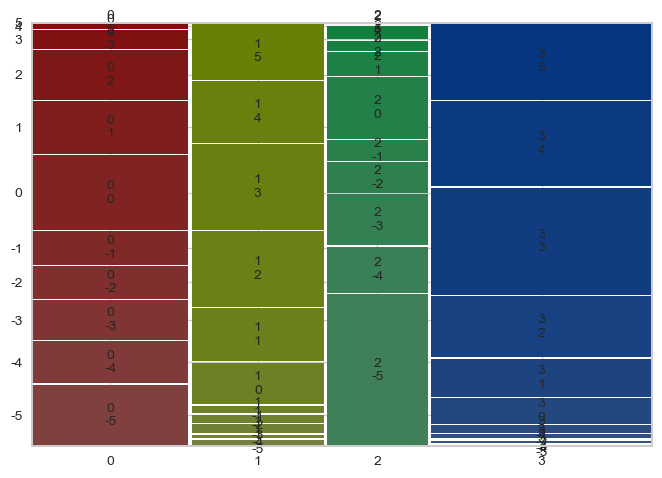

In [27]:
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product
mosaic(pd.crosstab(cluster,df['Like']).stack())
plt.show()

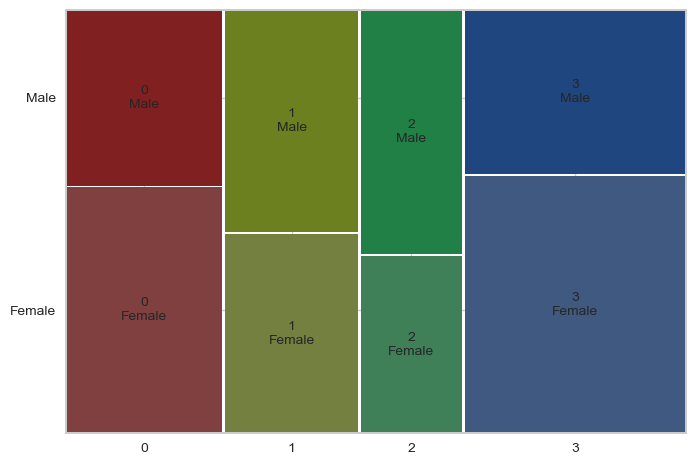

In [28]:
#Mosaic plot gender vs segment
mosaic(pd.crosstab(cluster,df['Gender']).stack())
plt.show()

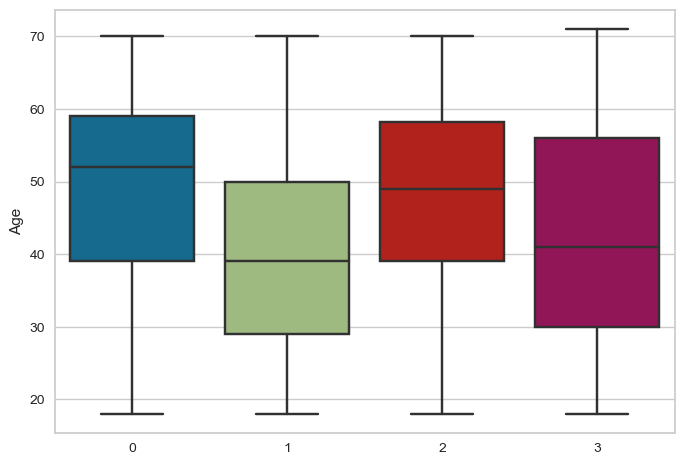

In [29]:
#box plot for age
sns.boxplot(cluster, y="Age", data=df)
plt.show()

##  Selecting Target Segment

In [30]:
#Calculating the mean
#Visit frequency
df['VisitFrequency'] = LabelEncoder().fit_transform(df['VisitFrequency'])
visit = df.groupby('cluster')['VisitFrequency'].mean()
visit = visit.to_frame().reset_index()
visit

,cluster,VisitFrequency
0,0,2.717742
1,1,2.549206
2,2,2.691667
3,3,2.610266


In [31]:
#Like
df['Like'] = LabelEncoder().fit_transform(df['Like'])
Like = df.groupby('cluster')['Like'].mean()
Like = Like.to_frame().reset_index()
Like

,cluster,Like
0,0,3.857527
1,1,7.180952
2,2,2.329167
3,3,7.866920


In [32]:
#Gender
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])
Gender = df.groupby('cluster')['Gender'].mean()
Gender = Gender.to_frame().reset_index()
Gender

,cluster,Gender
0,0,0.416667
1,1,0.526984
2,2,0.579167
3,3,0.389734


In [33]:
segment = Gender.merge(Like, on='cluster', how='left').merge(visit, on='cluster', how='left')
segment

,cluster,Gender,Like,VisitFrequency
0,0,0.416667,3.857527,2.717742
1,1,0.526984,7.180952,2.549206
2,2,0.579167,2.329167,2.691667
3,3,0.389734,7.866920,2.610266


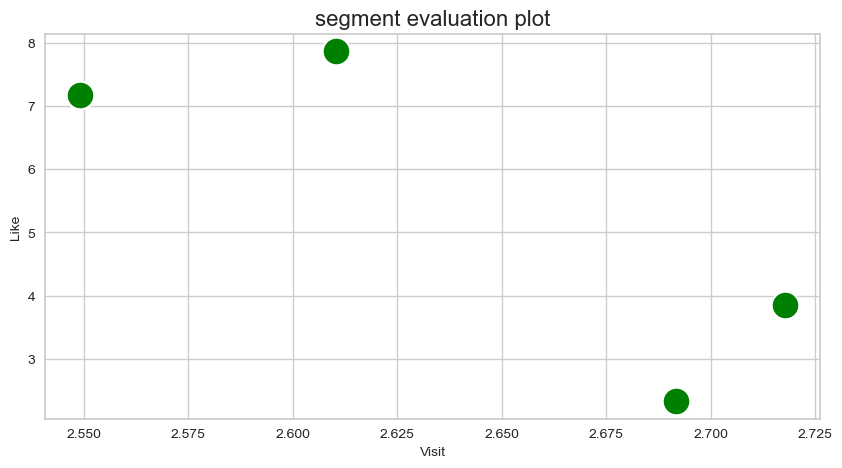

In [35]:
#Target segments
plt.figure(figsize = (10,5))
sns.scatterplot(x = "VisitFrequency", y = "Like",data=segment,s=400, color="green")
plt.title("segment evaluation plot",
          fontsize = 16) 
plt.xlabel("Visit", fontsize = 10) 
plt.ylabel("Like", fontsize = 10) 
plt.show()